# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
# Installing the libraries. Prefer binary wheels for compatibility with the notebook's Python.
%pip install --upgrade numpy pandas matplotlib seaborn --prefer-binary -q
# After running the above line, restart the notebook kernel and run all cells sequentially.

Note: you may need to restart the kernel to use updated packages.


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Read the dataset from the foodhub_order.csv file using panda
foodhub_df = pd.read_csv("data/foodhub_order.csv")

In [5]:
# Write your code here to view the first 5 rows
foodhub_df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
# Retrieve number of rows and columns using the shape attribute of the DataFrame.
rows, columns = foodhub_df.shape

print(f'Total Rows: {rows:,}')
print(f'Total Columns: {columns:,}')

Total Rows: 1,898
Total Columns: 9


#### Observations:

The number of rows and columns in the DataFrame, foodhub_df, are:

1,898 rows
9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
# Retrieve summary information of the DataFrame using the info() method.
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
As per the info() method output:

| Information | DataFrame | 
| -------- | -------- | 
| Column names and corresponding data types. | 1 float64, 4 int64, 4 object | 
| Number of non-null values in each column. foodhubdf is complete with no non-null values. | Non-Null Count indicates a full dataset. | 
| Memory usage of the DataFrame | 133.6+ KB | 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
# check for any missing data.
missing_values = foodhub_df.isnull().sum()

if missing_values.sum() > 0:
    print("There are missing data points in the dataset.")
else:
    print("There are no missing data points in the dataset.")

There are no missing data points in the dataset.


#### Observations:
The dataset contains no missing values, which improves the accuracy and completeness of subsequent analysis and modeling.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
# print("only numeric columns:    ", food_hub_df.describe())
# print(food_hub_df.describe().T)
print("All columns:\n" )
print(foodhub_df.describe(include="all"))
print("\n")

All columns:

            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique     

In [10]:
# Retrieve the statisical summary of the data.
food_prep_min_value = foodhub_df['food_preparation_time'].min()
food_prep_avg_value = foodhub_df['food_preparation_time'].mean()
food_prep_max_value = foodhub_df['food_preparation_time'].max()

print('Food preparation time statistics in minutes:')
print('Minimum:', food_prep_min_value)
print('Average:', food_prep_avg_value)
print('Maximum:', food_prep_max_value)


Food preparation time statistics in minutes:
Minimum: 20
Average: 27.371970495258168
Maximum: 35


#### Observations:

The full descriptive table above shows comprehensive statistics for every numeric column, but to quickly summarize kitchen performance we can focus only on the food preparation times. For the column food_preparation_time the key metrics are:

* Minimum time is 20 minutes
* Average time is 27.3 minutes
* Maximum time is 35 minutes

These three values provide a concise snapshot of how long restaurants typically take to prepare orders and make it easy to compare kitchen performance across restaurants or time periods.

| order_id | customer_id | cost_of_the_order | food_preparation_time | delivery_time
| -------- | -------- | -------- | -------- | -------- |
| count	| 1.898000e+03	| 1898.000000	| 1898.000000	|1898.000000	|1898.000000
| mean	| 1.477496e+06	| 171168.478398	| 16.498851	| 27.371970	| 24.161749
| std	| 5.480497e+02	| 113698.139743	| 7.483812	| 4.632481	| 4.972637
| min	| 1.476547e+06	| 1311.000000	| 4.470000	| 20.000000	| 15.000000
| 25%	| 1.477021e+06	| 77787.750000	| 12.080000	| 23.000000	| 20.000000
| 50%	| 1.477496e+06	| 128600.000000	| 14.140000	| 27.000000	| 25.000000
| 75%	| 1.477970e+06	| 270525.000000	| 22.297500	| 31.000000	| 28.000000
| max	| 1.478444e+06	| 405334.000000	| 35.410000	| 35.000000	| 33.000000


### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
# Count the number of orders that have not been rated (rating = 'Not given').
no_ratings = foodhub_df['rating'].value_counts()['Not given']

# Print the number of orders that have not been rated.
print('The number of orders not rated are ' + str(no_ratings))

# Calculate the percentage of orders that have not been rated.
no_ratings_impact = round((no_ratings/rows)*100, 2)
print(f'Unrated orders have a {no_ratings_impact}% impact on the dataset.')

The number of orders not rated are 736
Unrated orders have a 38.78% impact on the dataset.


#### Observations:
A large number of orders—736 out of 1,898—have no ratings, limiting restaurants’ ability to spot quality issues or design offers for new and repeat customers. I recommend incentivizing customers (e.g., discounts or loyalty points) to boost rating submissions and improve the feedback signal.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### Data Dictionary Reference
| Column | Definition |
| ------ | ---------- |
| order_id | Unique ID of the order |
| customer_id | ID of the customer who ordered the food |
| restaurant_name | Name of the restaurant |
| cuisine_type | Cuisine ordered by the customer |
| cost_of_the_order | Cost of the order |
| day_of_the_week | Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday) |
| rating | Rating given by the customer out of 5 |
| food_preparation_time | Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation. |
| delivery_time | Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps |

In [12]:
# Check for the unique orders in the dataset.
print(f'order_id: There are {foodhub_df["order_id"].nunique():,}.')
customer_ids = foodhub_df['customer_id'].nunique()
print(f'customer_id: There are {customer_ids:,} customers.')
restaurants = foodhub_df['restaurant_name'].nunique()
print(f'restaurant_name: There are {restaurants:,} restaurants.')
cuisine_types = foodhub_df['cuisine_type'].nunique()
print(f'cuisine_type: There are {cuisine_types:,} cuisines.')

order_id: There are 1,898.
customer_id: There are 1,200 customers.
restaurant_name: There are 178 restaurants.
cuisine_type: There are 14 cuisines.


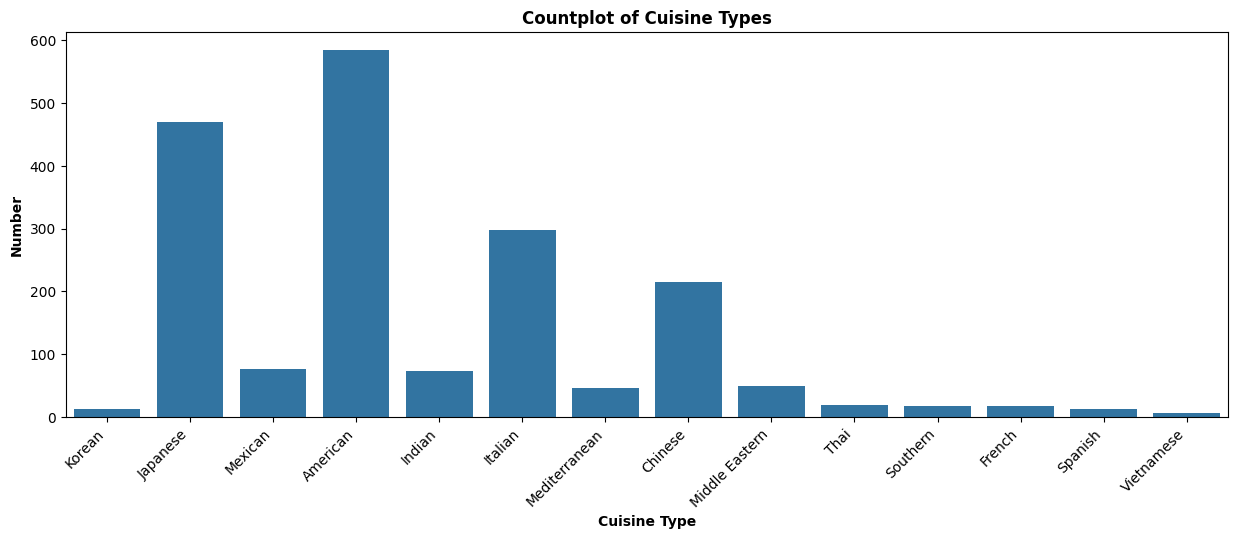

In [ ]:
# Create countplot for the different cuisine types.
plt.figure(figsize = (15,5))
sns.countplot(data = foodhub_df, x = 'cuisine_type')

plt.title('Countplot of Cuisine Types', fontsize=12, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Show plot.
plt.show()

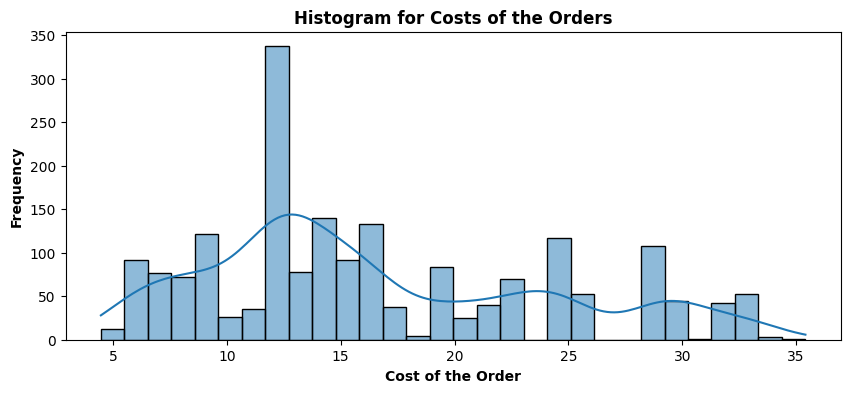

In [14]:
# Plot a histogram for the 'cost_of_order' column.
plt.figure(figsize=(10, 4))
sns.histplot(foodhub_df['cost_of_the_order'], bins=30, edgecolor='black', kde=True)

# Set the labels, title, position, fontsize and alignment for the barchart output.
plt.title('Histogram for Costs of the Orders', fontsize=12, fontweight='bold')
plt.xlabel('Cost of the Order', fontsize=10, fontweight='bold')
plt.ylabel('Frequency', fontsize=10, fontweight='bold')

# Show to plot.
plt.show()

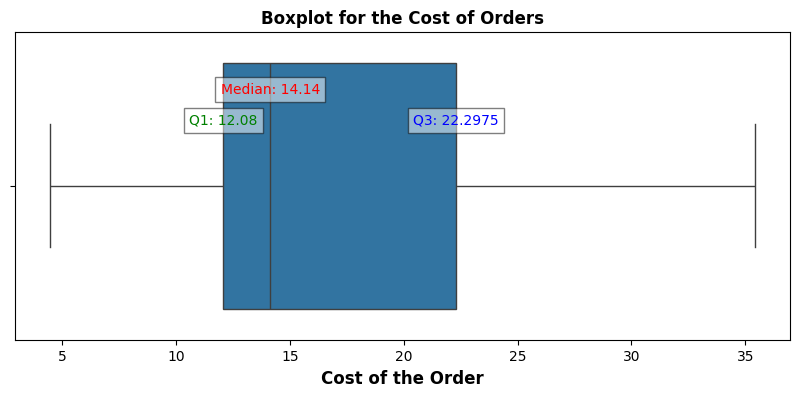

In [15]:
# Create boxplot for cost of orders.
plt.figure(figsize=(10, 4))
box_plot = sns.boxplot(x=foodhub_df['cost_of_the_order'])

# Calculate quartiles and median
Q1 = foodhub_df['cost_of_the_order'].quantile(0.25)
Q3 = foodhub_df['cost_of_the_order'].quantile(0.75)
median = foodhub_df['cost_of_the_order'].median()

# Set the labels, title, position, fontsize and alignment for the output.
plt.text(x=median, y=-0.3, s=f'Median: {median}', color='red', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q1, y=-0.2, s=f'Q1: {Q1}', color='green', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q3, y=-0.2, s=f'Q3: {Q3}', color='blue', ha='center', bbox=dict(facecolor='white', alpha=0.5)) 
plt.xlabel('Cost of the Order', fontsize=12, fontweight='bold')
plt.title('Boxplot for the Cost of Orders', fontsize=12, fontweight='bold')

# Show the plot.
plt.show()

In [16]:
# Get the unique days of the week in the dataset.
days_of_week = foodhub_df['day_of_the_week'].nunique()

# Get the names of the days of the week.
names_of_days = foodhub_df['day_of_the_week'].unique()

# Convert the names of the days to a string.
names_of_days_str = ', '.join(names_of_days)

# Output the number of days of the week and the names of the days.
print(f'There are {days_of_week:,} days of the week. The days of the week are {names_of_days_str}.')

There are 2 days of the week. The days of the week are Weekend, Weekday.


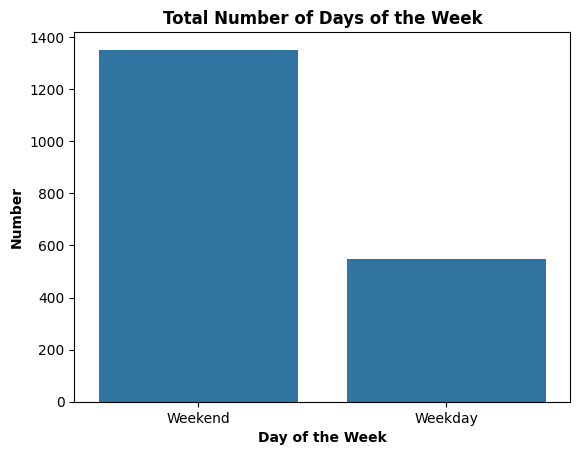

In [17]:
# Create a countplot for the number of days of the week.
sns.countplot(data = foodhub_df, x = 'day_of_the_week') 

# Set the labels, title, position, fontsize and alignment for the output.
plt.title('Total Number of Days of the Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')

# Show the plot.
plt.show()

In [18]:
# Check for unique ratings in the dataset.
ratings = foodhub_df['rating'].nunique()

# Get the names of the days of the week.
ratings_values = foodhub_df['rating'].unique()

# Convert the unique rating values to a string.
rating_value = ', '.join(ratings_values)

# Output the unique ratings and value names.
print(f'There are {ratings:,} unique ratings. The values are {rating_value}.')


There are 4 unique ratings. The values are Not given, 5, 3, 4.


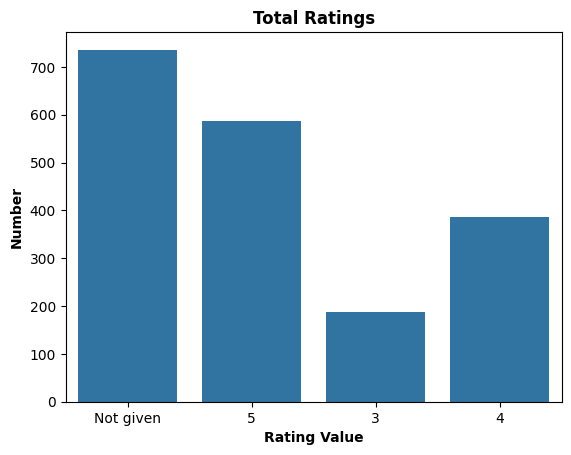

In [53]:
sns.countplot(data = foodhub_df, x = 'rating') 

plt.title('Total Ratings', fontsize=12, fontweight='bold')
plt.xlabel('Rating Value', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')
plt.show()

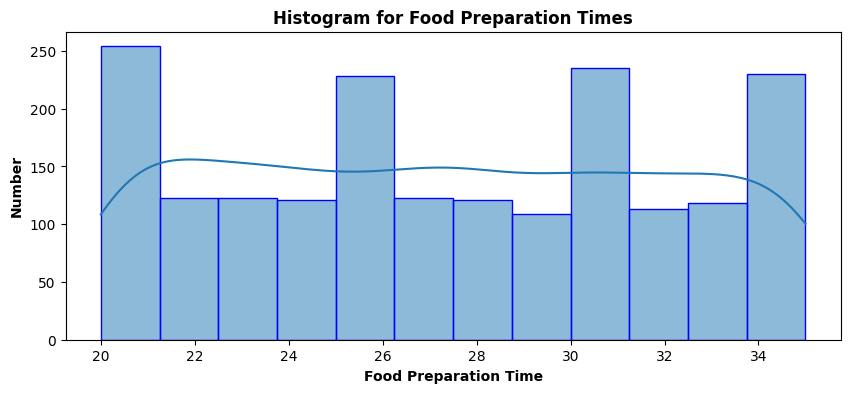

In [52]:
# Plot a histogram for the food preprations times.
plt.figure(figsize=(10, 4))
sns.histplot(foodhub_df['food_preparation_time'], edgecolor='blue', kde=True)

plt.title('Histogram for Food Preparation Times', fontsize=12, fontweight='bold')
plt.xlabel('Food Preparation Time', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')


plt.show()

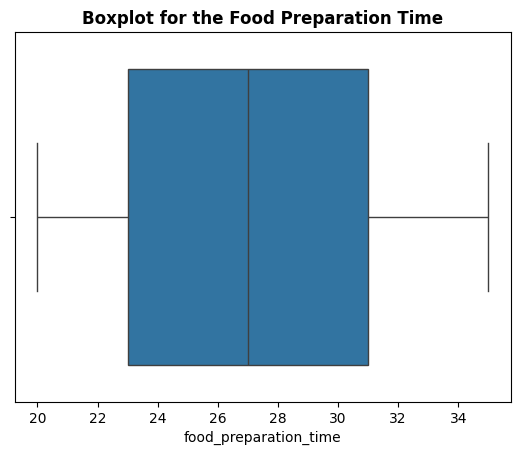

In [47]:
sns.boxplot(data=foodhub_df,x='food_preparation_time')
plt.title('Boxplot for the Food Preparation Time', fontsize=12, fontweight='bold')
plt.show()

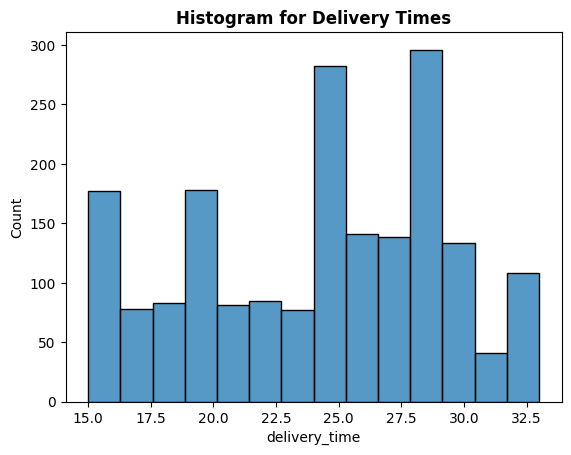

In [ ]:
sns.histplot(data=foodhub_df, x='delivery_time')
plt.title('Histogram for Delivery Times', fontsize=12, fontweight='bold')
plt.show()

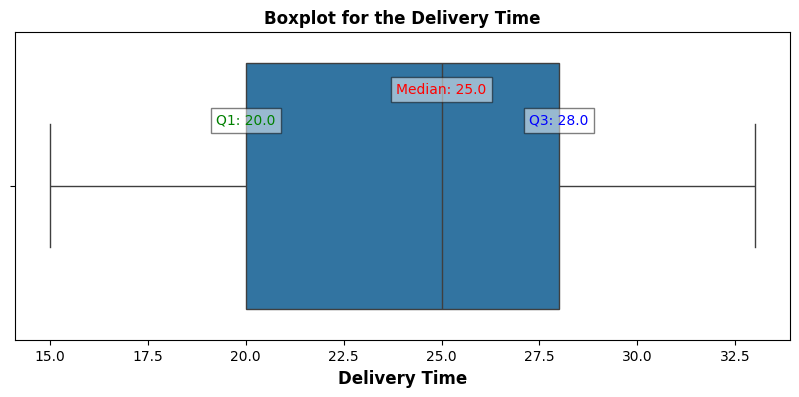

In [23]:
# Create boxplot for delivery times.
plt.figure(figsize=(10, 4))
box_plot = sns.boxplot(x=foodhub_df['delivery_time'])

# Calculate quartiles and median
Q1 = foodhub_df['delivery_time'].quantile(0.25)
Q3 = foodhub_df['delivery_time'].quantile(0.75)
median = foodhub_df['delivery_time'].median()

# Set the labels, title, position, fontsize and alignment for the output.
plt.text(x=median, y=-0.3, s=f'Median: {median}', color='red', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q1, y=-0.2, s=f'Q1: {Q1}', color='green', ha='center', bbox=dict(facecolor='white', alpha=0.5))
plt.text(x=Q3, y=-0.2, s=f'Q3: {Q3}', color='blue', ha='center', bbox=dict(facecolor='white', alpha=0.5)) 
plt.xlabel('Delivery Time', fontsize=12, fontweight='bold')
plt.title('Boxplot for the Delivery Time', fontsize=12, fontweight='bold')

# Show the plot.
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [24]:
# Write the code here
# Create a new DataFrame, top_restaurants_df and retrieve the top 5 restaurants with the highest number of orders.
top_restaurants_df = foodhub_df['restaurant_name'].value_counts().reset_index()

# Print readable column names for the DataFrame foodhub_df.
top_restaurants_df.columns = ['Restaurant Name', 'Number of Orders']

# Print only the top 5 restaurants without the index column.
print(top_restaurants_df.head(5).to_string(index=False))

          Restaurant Name  Number of Orders
              Shake Shack               219
        The Meatball Shop               132
        Blue Ribbon Sushi               119
Blue Ribbon Fried Chicken                96
                     Parm                68


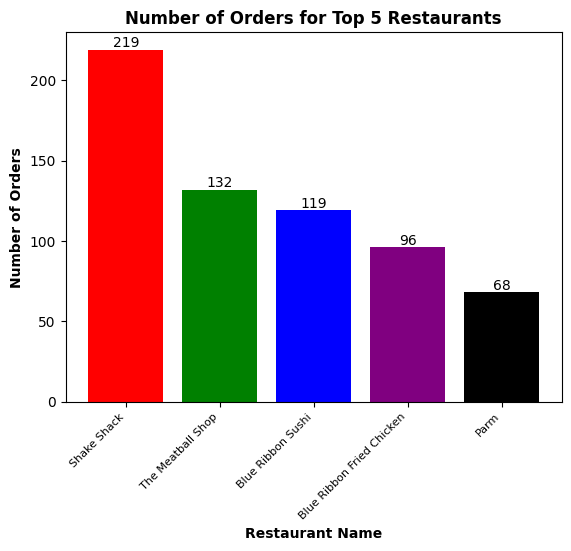

In [25]:
# To better visualize the number of orders for the top 5 restaurants, a bar chart was created.

# Create a list of colors to use for the bar chart restaurant names.
colors = ['red', 'green', 'blue', 'purple', 'black']

# Create bar chart of the top 5 restaurants with the highest number of orders.
restaurant_bars = plt.bar(top_restaurants_df['Restaurant Name'].head(5), top_restaurants_df['Number of Orders'].head(5),color=colors)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Restaurant Name', fontsize=10, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='bold')
plt.title('Number of Orders for Top 5 Restaurants', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')

# Add order numbers to the histogram bars for readability.
for restaurant_bar in restaurant_bars:
    yval = restaurant_bar.get_height()
    plt.text(restaurant_bar.get_x() + restaurant_bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Display the bar chart.
plt.show()

#### Observations:

The top 5 restaurants with the highest number of orders is shown in the chart below. 

Restaurant Name -- Number of Orders
1. Shake Shack -- 219
2. The Meatball Shop -- 132
3. Blue Ribbon Sushi -- 119
4. Blue Ribbon Fried Chicken -- 96
5. Parm -- 68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# Write the code here
# Get the most popular cuisine type and the number of orders.

# Filter the DataFrame to only include orders made on weekends.
weekend_orders_df = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine type and the number of orders for weekends.
cuisine_counts = weekend_orders_df['cuisine_type'].value_counts()
most_popular_cuisine = cuisine_counts.idxmax()
number_of_orders = cuisine_counts.max()

# Print simple output of the most popular cuisine type and the number of orders for weekends.
print(f'The most popular cuisine type on weekends is {most_popular_cuisine} with {number_of_orders} orders.')

The most popular cuisine type on weekends is American with 415 orders.


#### Observations:
The most popular cuisine on the weekend, Saturday and Sunday, is American with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
# Write the code here
# Query foodhub_df DataFrame for orders with a cost greater than $20.
expensive_orders = foodhub_df[foodhub_df['cost_of_the_order'] > 20]

# Calculate the % of expensive orders vs total orders.
percentage_expensive_orders = (len(expensive_orders)/len(foodhub_df)) * 100
print(f"The percentage of orders costing more than $20 is {percentage_expensive_orders:.0f}%.")

The percentage of orders costing more than $20 is 29%.


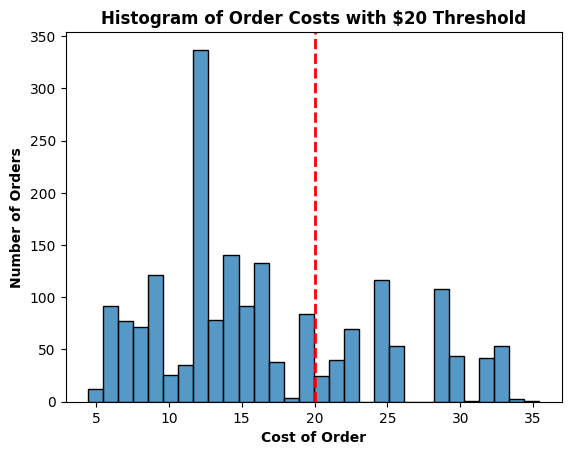

In [28]:
# Visualizing the expensive vs total orders a histogram provides an easier view to consume.
sns.histplot(foodhub_df['cost_of_the_order'], bins=30, edgecolor='black')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
# Added vertical line at $20 for reference.
plt.axvline(20, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Cost of Order', fontsize=10, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='bold')
plt.title('Histogram of Order Costs with $20 Threshold', fontsize=12, fontweight='bold')

# Show histogram.
plt.show()

#### Observations:
About 29% of all orders cost more than $20. Most orders, though, fall between $12 and $17. To encourage more customers to spend over $20, the company could offer discounts or deals to regular customers. For new customers, giving a free item or a discount on their next order might help boost how much they spend each time.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [43]:
# Write the code here
# Query the foodhub_df DataFrame for orders mean delivery time.
mean_delivery_time = foodhub_df['delivery_time'].mean()

# Print the mean order delivery time and round it to the nearest minute. 
print(f'The mean order delivery time is {mean_delivery_time: .0f} minutes.')


The mean order delivery time is  24 minutes.


#### Observations:
The average time it takes to deliver an order is 24 minutes. To show how delivery times vary, we can use a chart called a histogram. This chart displays all the different delivery times, with a dashed line marking the 24-minute average so it’s easy to spot.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [42]:
# Write the code here
# Select the top 3 customers with the highest number of orders using the value_counts() method
# and the nlargest() method to retrieve the top 3 customers.
top_customers = foodhub_df['customer_id'].value_counts().nlargest(3)

# Convert the series to a DataFrame named top_customers_df and rename the columns for readability.
top_customers_df = top_customers.reset_index()
top_customers_df.columns = ['Customer ID', 'Number of Orders']


print('Top 3 customers:\n', top_customers_df.to_string(index=False))

Top 3 customers:
  Customer ID  Number of Orders
       52832                13
       47440                10
       83287                 9


#### Observations:
Customer 52832 tries lots of different types of food from different restaurants. Customer 832287 also has some variety, but customer 47449 only orders American food. This gives the company a chance to offer special deals to encourage customers like 47449 to try something new—like sending them coupons for other cuisines.

Customers who already enjoy a mix of food could still get offers, but those deals could focus on their favorite restaurants or the ones they’ve rated the highest. This way, everyone gets something that fits their taste.
### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [33]:
#### Cuisine vs Cost of the Order

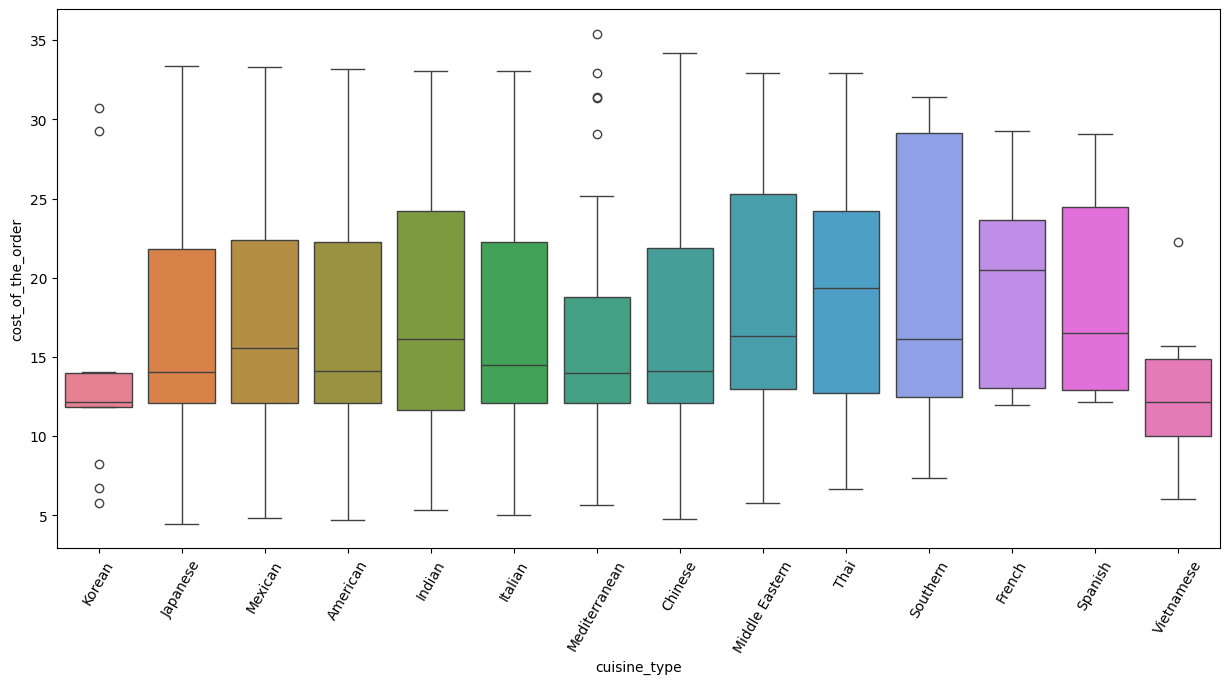

In [ ]:
# boxplot to compare cost of the order vs cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = foodhub_df, hue='cuisine_type')
plt.xticks(rotation = 60)

plt.show()

#### Obversations:
Some cuisine types like Korean, Mediterranean, and Vietnamese have a few unusual order amounts—either very high or very low—which might be because of large orders or mistakes in the data. For more popular cuisines, there’s a wide range in order costs, meaning prices vary a lot.

Most cuisine types have a middle price (median) that’s closer to the lower end, showing that most orders cost between $15 and $17. This means lower-cost orders are more common than expensive ones.

C:\Users\rohit\AppData\Local\Temp\ipykernel_30372\661613188.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = foodhub_df, palette = 'YlOrBr_r')


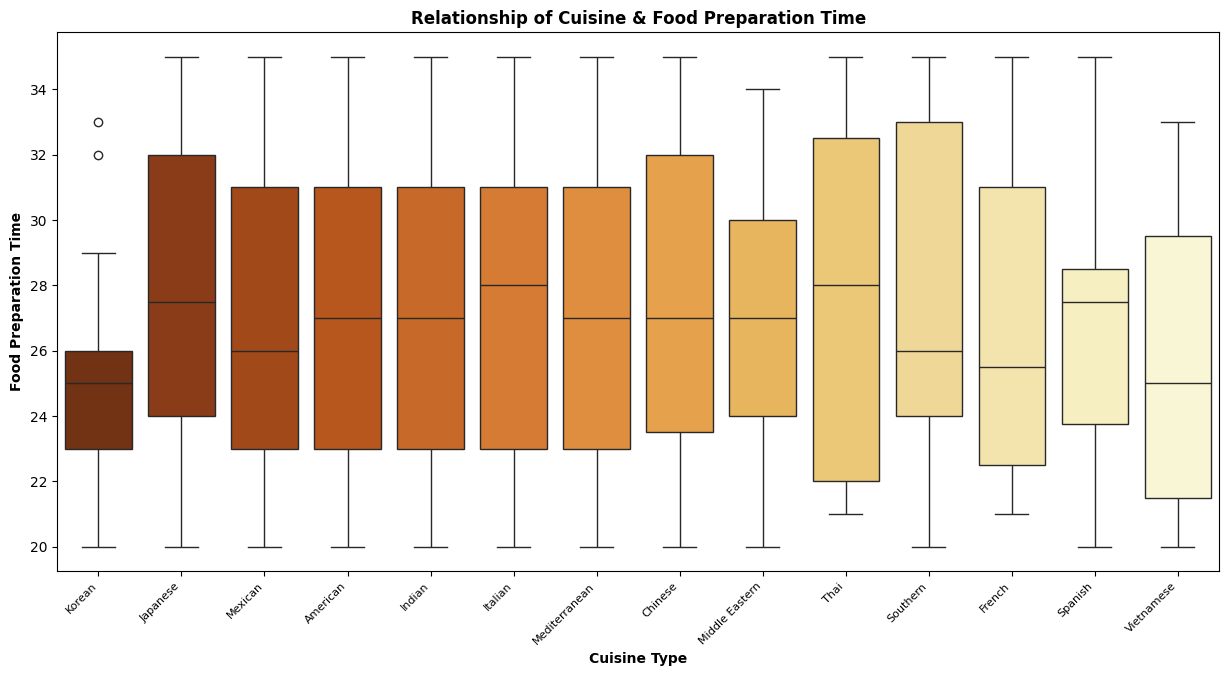

In [ ]:
# Examine the relationship between cost of the order and cuisine type.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between cost of the order and cuisine type.
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = foodhub_df, palette = 'YlOrBr_r')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Cuisine Type', fontsize=10, fontweight='bold')
plt.ylabel('Food Preparation Time', fontsize=10, fontweight='bold')
plt.title('Relationship of Cuisine & Food Preparation Time', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Obversations:
Most restaurants take a long time to prepare food. The company should look into why that is—maybe it’s because of large orders or not enough staff in the kitchen. Some types of food are quicker to make, but those restaurants don’t seem to earn as much money. It’s worth checking if faster meals can still be profitable or if slower prep times are causing delays and lower ratings.

C:\Users\rohit\AppData\Local\Temp\ipykernel_30372\605418570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = foodhub_df, palette = 'RdPu')


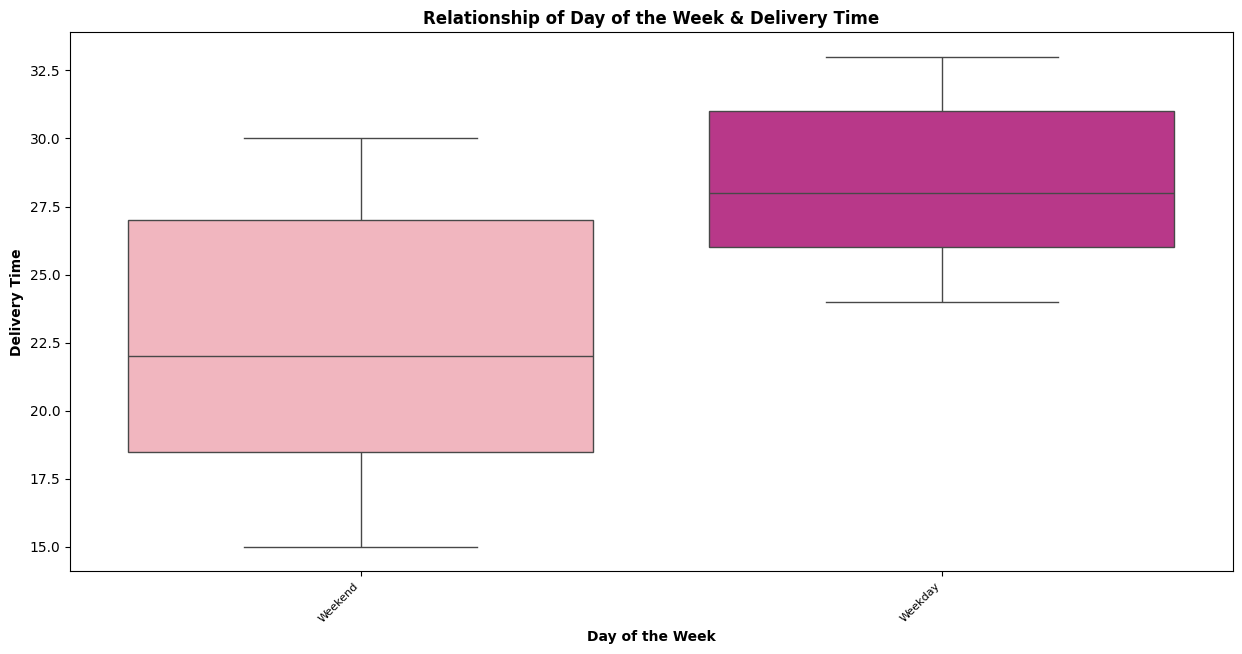

In [ ]:
# Examine the relationship between day of the week and delivery time.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between day of the week and delivery time.
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = foodhub_df, palette = 'RdPu')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Day of the Week', fontsize=10, fontweight='bold')
plt.ylabel('Delivery Time', fontsize=10, fontweight='bold')
plt.title('Relationship of Day of the Week & Delivery Time', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Observations:
Delivery times during the week vary a lot, which is a concern since many customers rely on quick service during busy workdays. On weekends, delivery times are usually shorter—probably because more delivery drivers are available to handle the extra orders.

In [ ]:
# Sum the revenue generated by each restaurant and display the top 20 restaurants.

# Display all rows in the DataFrame.
pd.set_option('display.max_rows', None)
foodhub_df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Sush

#### Obversations:
The company should take a closer look at restaurants that aren’t bringing in much money. These places might be causing higher delivery costs and using more time and effort from the delivery team. Fixing this could help save money and improve service.

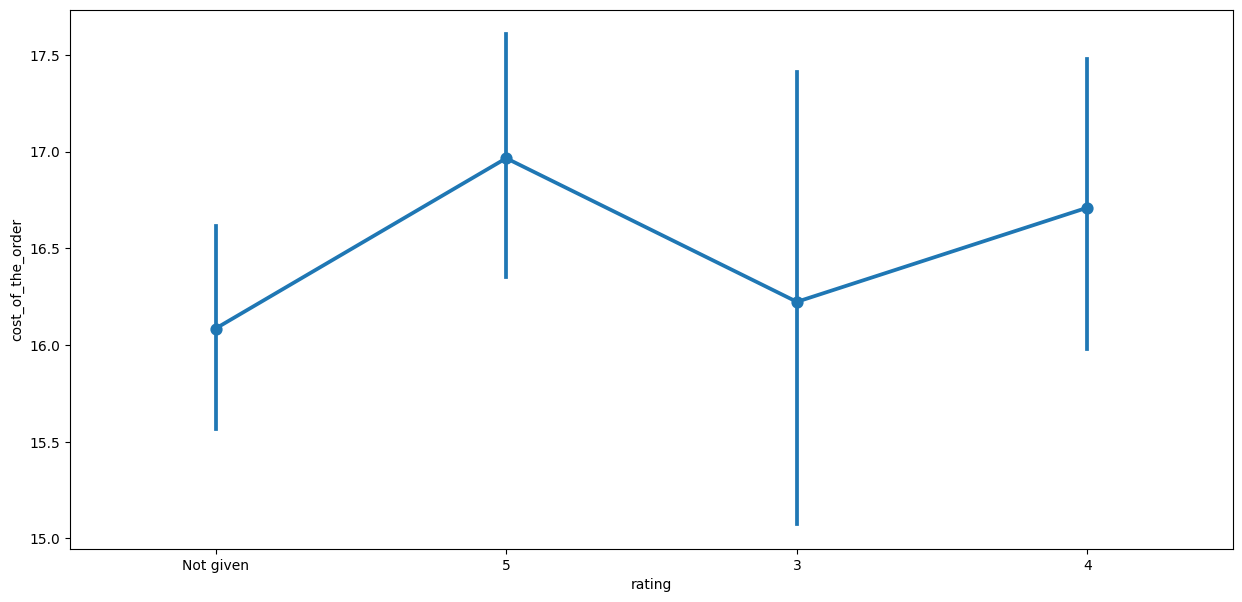

In [40]:
# pointplot to compare rating vs cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = foodhub_df)

plt.show()


#### Obversations:
The delivery times for orders with no rating and those with a top rating of 5 are pretty similar. Orders rated 3 show the biggest difference in delivery times, which makes sense—customers might be unsure how to rate when delivery is inconsistent. Interestingly, orders rated 4 have shorter delivery times than expected, which might point to an issue in the data.

Since many customers don’t leave a rating, it would help to offer a small reward or reminder to encourage them to rate their orders. This could give us a better idea of what’s really affecting their experience.

Also, it might be useful to allow more detailed rating options. If more people gave ratings below 3, we could better understand which restaurants need to improve.

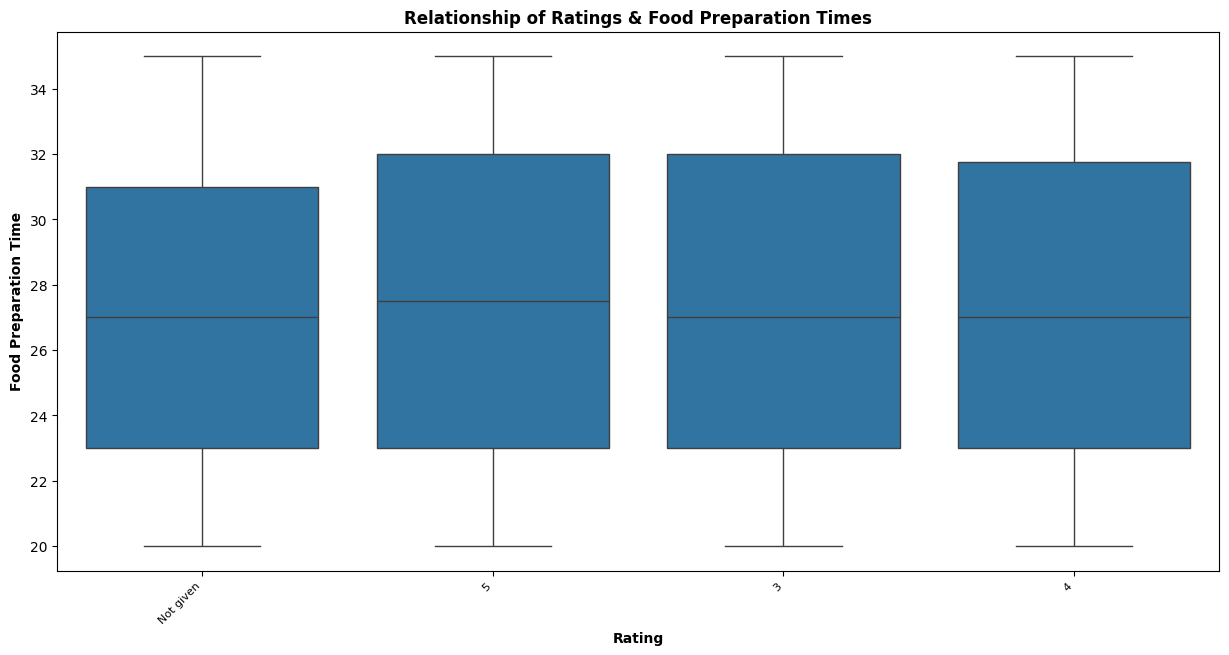

In [ ]:
# Examine the relationship between day of the week and delivery time.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between rating and preparation time.
sns.boxplot(x='rating', y='food_preparation_time', data=foodhub_df)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Food Preparation Time', fontsize=10, fontweight='bold')
plt.title('Relationship of Ratings & Food Preparation Times', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Obversations:
The time it takes to prepare the food doesn’t change much from order to order—it’s pretty consistent. That’s a good sign. But when it comes to delivery time, there’s more variation, and it seems to have a bigger effect on how customers rate their experience.

Since ratings are based on both how long the food takes to make and how long it takes to arrive, this shows that restaurants are doing well with preparation, but delivery delays might be hurting customer satisfaction.

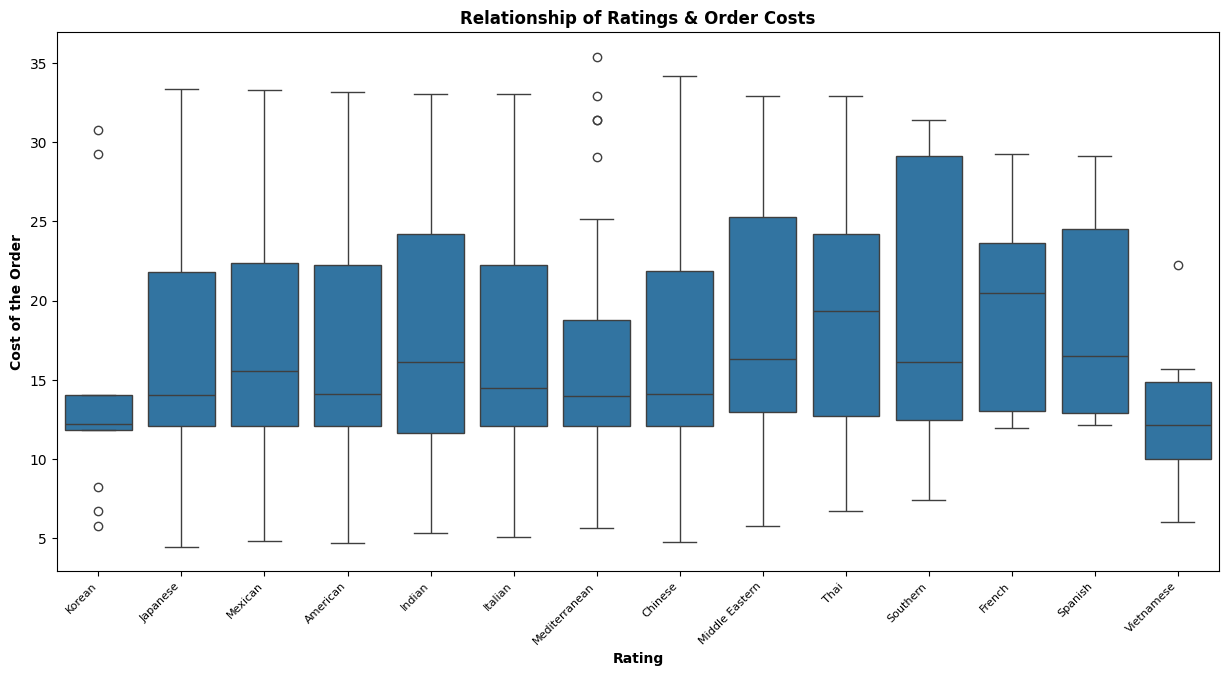

In [ ]:
# Examine the relationship between rating and cost of the order.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between rating and preparation time.
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=foodhub_df)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Cost of the Order', fontsize=10, fontweight='bold')
plt.title('Relationship of Ratings & Order Costs', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

#### Obversations:
There’s a lot of difference in how much people spend on their orders and the ratings they give. It’s worth asking: are customers giving lower ratings—or skipping ratings—because the food costs more or because it took too long to arrive?

We don’t have enough details to know for sure, especially since many ratings don’t include comments. If the app made it easier for customers to leave quick feedback, like tapping a reason for their rating, it could help us understand what’s really affecting their experience.

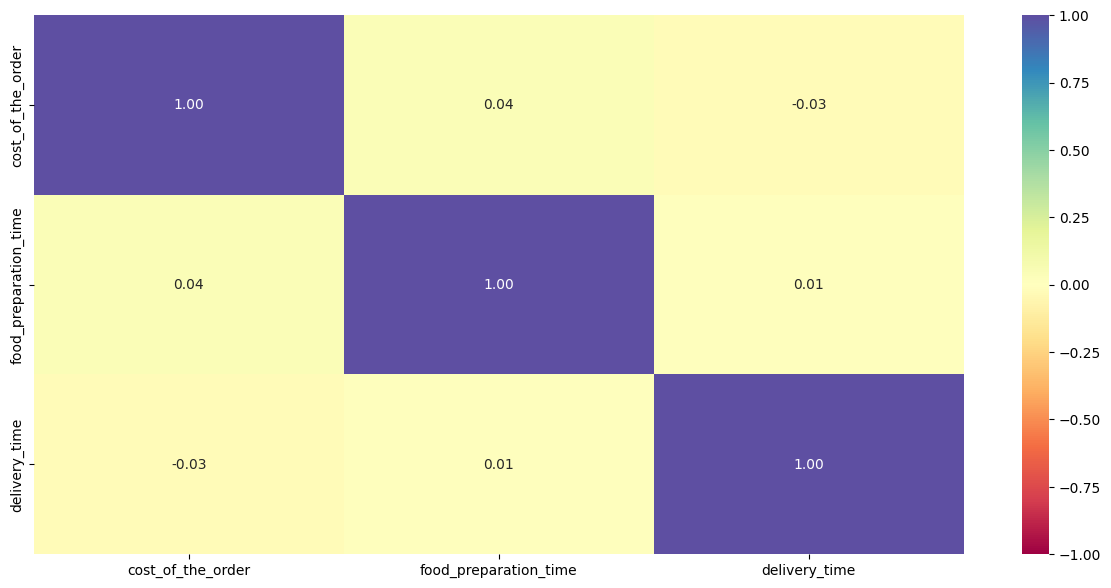

In [38]:
# heatmap to compare cost of the order, food prep time, and delivery time
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
# Create a new DataFrame with the correlation matrix
corr_df = foodhub_df[col_list].corr()

plt.figure(figsize=(15, 7))
sns.heatmap(corr_df, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

#### Obversations:
We’ve seen that the cost of the order, how long it takes to prepare the food, and how long it takes to deliver are all closely connected. But the biggest impact on customer ratings comes from how long the food takes to prepare and deliver.

These two areas—food prep time and delivery time—are the most important parts of the service that need to be looked at more closely to improve customer satisfaction.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Find the restaurants that are not rated (Note given) and create a new DataFrame, restaurants_not_rated_df.
restaurants_not_rated_df = foodhub_df[foodhub_df['rating'] != 'Not given'].copy()

# The rating columns is an object type and should be converted to a type int.
restaurants_not_rated_df['rating'] = restaurants_not_rated_df['rating'].astype('int')

# Create a new DataFrame, ratings_count_df, that groups the restaurants by name and calculates the count and mean of ratings.
ratings_count_df = restaurants_not_rated_df.groupby(['restaurant_name'])['rating'].agg(['count', 'mean']).reset_index()

# Filter the restaurants with a rating count of more than 50 and a mean rating greater than 4.
restaurants_promo_df = ratings_count_df[(ratings_count_df['count'] > 50) & (ratings_count_df['mean'] > 4)]

# Output the restaurants sorted by the mean rating of 4 in descending order.
restaurants_promo_df.head()

,restaurant_name,count,mean
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### Observations:
Right now, only 4 restaurants meet the requirements for a special promotion. But when we look at the data, there are 736 restaurants where customers didn’t leave a rating. If we encourage customers to give ratings—maybe by offering a small reward or discount—it could help more restaurants qualify for future promotions.

Having more restaurants in these promotions would likely bring in more orders and increase overall earnings for the company.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Count the number of orders greater than $20.
num_orders_over_20 = foodhub_df[foodhub_df['cost_of_the_order'] > 20]['cost_of_the_order'].count()

# Calculate the total revenue of orders greater than $20
total_revenue_over_20 = foodhub_df[foodhub_df['cost_of_the_order'] > 20]['cost_of_the_order'].sum()

# Print the order count and calculate the net revenue using total count and the 25% surcharge.
print(f'The number of orders costing more than $20 is {num_orders_over_20} which generates a net revenue of ${total_revenue_over_20:,.2f}.')

# Count the number of orders greater than $5 and less than $20.
num_orders_between_5_and_20 = foodhub_df[(foodhub_df['cost_of_the_order'] >= 5) & (foodhub_df['cost_of_the_order'] < 20)]['cost_of_the_order'].count()

# Calculate the total revenue of orders greater than $5 and less than $20.
total_revenue_between_5_and_20 = foodhub_df[(foodhub_df['cost_of_the_order'] >= 5) & (foodhub_df['cost_of_the_order'] < 20)]['cost_of_the_order'].sum()

# Print the order count and calculate the net revenue using total count and the 15% surcharge.
print(f'The number of orders costing less than $5 is {num_orders_between_5_and_20} which generates a net revenue of ${total_revenue_between_5_and_20:,.2f}.')

# Calculate the total revenue using the number of orders over $20 and $5.
print(f'Total revenue is ${total_revenue_over_20 * .25 + total_revenue_between_5_and_20 * .15:,.2f}.')

The number of orders costing more than $20 is 555 which generates a net revenue of $14,754.91.
The number of orders costing less than $5 is 1334 which generates a net revenue of $16,517.17.
Total revenue is $6,166.30.


In [ ]:
# Example of revenue difference if reversed as mentioned in the observation.
# Calculate the total revenue using the number of orders over $20 and $5.
print(f'Total revenue is ${total_revenue_over_20 * .15 + total_revenue_between_5_and_20 * .25:,.2f}.')

Total revenue is $6,342.53.


#### Observations:
The numner of orders costing more than more than 20 dollars is 555 which generates a net revenue of 14,754.91 dollars.
The number of orders costing less than 5 dollars is 1,334 which generates a net revenue of 16,517.17 dollars.
Total revenue is 6,166.30 dollars.

A recommendation to make is to reverse the surcharges. Lesser cost orders should be surcharged larger amounts to offset the costs. Example: a 5 dollars order costs just as much to delivery and prepare as a 20 dollar order. If reversed an additional 176.23 dollars would be netted. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Calculate the number of orders that take more than 60 minutes to get 
# delivered (food preparation time + delivery time).
orders_over_60_min = foodhub_df[foodhub_df['delivery_time'] + foodhub_df['food_preparation_time']> 60].shape[0]

# Include orders that take exactly 60 minutes to get delivered (food preparation time + delivery time).
orders_60_min_and_over = foodhub_df[foodhub_df['delivery_time'] + foodhub_df['food_preparation_time'] >= 60].shape[0]

# Calculate the total number of orders in the dataset.
total_orders = foodhub_df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes to get delivered.
percentage_over_60_min = (orders_over_60_min / total_orders) * 100
percentange_60_min_and_over = (orders_60_min_and_over / total_orders) * 100

# Print output.
print(f'The total number of orders that take over 60 minutes to delivery is {orders_over_60_min} and accounts for {percentage_over_60_min: .2f}% of the total orders.')
print(f'If we include orders that take exactly 60 minutes to get delivered, the total number of orders is {orders_60_min_and_over} and accounts for {percentange_60_min_and_over: .2f}% of the total orders.')


The total number of orders that take over 60 minutes to delivery is 200 and accounts for  10.54% of the total orders.
If we include orders that take exactly 60 minutes to get delivered, the total number of orders is 245 and accounts for  12.91% of the total orders.


#### Observations:
Out of all the food orders, 200 took more than 60 minutes to be delivered, which is about 10.5% of the total. If we also count the ones that took exactly 60 minutes, the number goes up to 245 orders, or roughly 12.9%.

Knowing this helps the company think about offering a delivery time promise to customers. For example, they could guarantee delivery in less than 60 minutes. If an order takes longer, customers could get a small reward like a discount or a coupon. This kind of offer might encourage more people to use the app, especially those who want their food quickly.

It’s also a good idea to check this data regularly. If certain restaurants often take too long, it could be a sign that something in their process needs fixing.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# The dataset only uses the 'day_of_the_week' set to a weekday or weekend.
# For better tracking of actual days of the week a function was created to categorize the days of the week.
# Recommendation:
#       The data should be cleaned-up to represent actual days of the week for better analysis.
#       This should be done to understand impact of delivery times on actual days of the week.
#       Example: Orders could be "pre-ordered" on a Monday but set to deliver on a Wednesday. 

mean_delivery_time_weekday = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print(f'Mean delivery time on weekdays is {mean_delivery_time_weekday: .2f}%')
mean_delivery_time_weekend = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f'Mean delivery time on weekends is {mean_delivery_time_weekend: .2f}%')

# Calculate the difference
difference = mean_delivery_time_weekday - mean_delivery_time_weekend

print(f'The difference between delivery time on weekdays vs weekends is {difference: .2f}%')

Mean delivery time on weekdays is  28.34%
Mean delivery time on weekends is  22.47%
The difference between delivery time on weekdays vs weekends is  5.87%


#### Observations:
The average delivery time on the weekends is less than weekdays by 6%. This could indicate that there are differences in staffing of the restaurants to prepare food quicker and/or there are more delivery drivers available. Deliveries overall are important but during the weekdays delivery times should be quicker to those that are working at businesses. The differences between delivery times should be investigated further looking at staffing and delivery support.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions & Recommendations:

Conclusions
1. Weekend Orders Dominate
A significant portion of orders are placed on weekends, indicating higher demand during these days.
Restaurants and delivery logistics are more active on weekends, suggesting peak operational periods.

2. Popular Cuisines
Japanese, American, and Italian cuisines are the most frequently ordered.
Restaurants like Shake Shack, Blue Ribbon Fried Chicken, and The Meatball Shop appear repeatedly, showing strong customer preference.

3. High-Performing Restaurants
Restaurants with consistently high ratings (4 or 5) and reasonable delivery/preparation times tend to be repeat favorites.
Shake Shack and Blue Ribbon Sushi variants are among the top performers in volume and customer satisfaction.

4. Delivery and Preparation Time Insights
Average food preparation time ranges between 20–35 minutes.
Delivery times vary widely, but most fall within the 20–30 minute range.
Longer preparation or delivery times often correlate with lower ratings or missing ratings.

5. Missing Ratings
A substantial number of orders lack customer ratings, which limits feedback-based insights.
This could be due to app design, user engagement, or post-delivery experience.

✅ Recommendations
1. Optimize Weekend Operations
Increase staffing and delivery capacity on weekends to meet peak demand.
Offer weekend-specific promotions or loyalty rewards to boost engagement.

2. Promote High-Demand Restaurants
Feature top-performing restaurants (e.g., Shake Shack, Blue Ribbon Sushi) prominently in the app.
Use customer favorites to drive curated recommendations and bundles.

3. Improve Rating Collection
Encourage customers to rate their orders through push notifications or incentives (e.g., discounts on next order).
Simplify the rating interface to increase participation.

4. Monitor and Reduce Delivery Delays
Use predictive analytics to flag orders likely to exceed delivery time thresholds.
Collaborate with restaurants to streamline food prep during peak hours.

5. Cuisine-Based Personalization
Leverage cuisine preferences to personalize app experience (e.g., “Top Japanese picks for you”).
Introduce filters and smart search based on past orders and ratings.

6. Data-Driven Restaurant Partnerships
Use order volume and rating trends to identify high-potential restaurant partners.
Offer performance dashboards to restaurants to help them improve prep time and customer satisfaction.

---